In [11]:
import pandas as pd
import numpy as np

In [12]:
enroll1=pd.read_csv("api_data_aadhar_enrolment\\api_data_aadhar_enrolment_0_500000.csv")
enroll2=pd.read_csv("api_data_aadhar_enrolment\\api_data_aadhar_enrolment_500000_1000000.csv")
enroll3=pd.read_csv("api_data_aadhar_enrolment\\api_data_aadhar_enrolment_1000000_1006029.csv")
#combine all three dataframes into one
enrollment=pd.concat([enroll1,enroll2,enroll3],ignore_index=True)
#save the combined dataframe into a csv file
enrollment.to_csv("enrollment_full_data.csv",index=False)

In [13]:
#verifying the merged dataframe
#verifying the merge
print(
    len(enroll1) + len(enroll2) + len(enroll3),
    len(enrollment)
)

1006029 1006029


In [14]:
print("Enrollment Dataset:")
print("\n\nHead about the dataset:")
print(enrollment.head())
print("----------------------------------------")
print("\n\nShape about the dataset:")
print(enrollment.shape)
print("----------------------------------------")
print("\n\nColumns about the dataset:")
print(enrollment.columns)
print("----------------------------------------")
print("\n\nNumber of duplicated rows in the dataset:")
print(enrollment.duplicated().sum())
print("----------------------------------------")
print("\n\nInformation about the dataset:")
print(enrollment.info())
print("----------------------------------------")
print("\n\nStatistical summary of the dataset:")
print(enrollment.describe())
print("----------------------------------------")
print("\n\nChecking for missing values in each column:")
print(enrollment.isnull().sum())

Enrollment Dataset:


Head about the dataset:
         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  
----------------------------------------


Shape about the dataset:
(1006029, 7)
----------------------------------------


Columns about the dataset:
Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')
----------------------------------------


Number of duplicated rows in the dataset:
22957
-----

PINCODE DATASET INFORMATION

In [15]:
pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")

C:\Users\JYOTI GUPTA\AppData\Local\Temp\ipykernel_27344\1518679534.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")


In [16]:
#Ensure columns are strings and convert to title case
pincode['state'] = pincode['state'].astype(str).str.title()
pincode['district'] = pincode['district'].astype(str).str.title()

In [17]:
print("Pincode Dataset:")
print("\n\nHead about the dataset:")
print(pincode.head())
print("----------------------------------------")
print("\n\nShape about the dataset:")
print(pincode.shape)
print("----------------------------------------")
print("\n\nColumns about the dataset:")
print(pincode.columns)
print("----------------------------------------")
print("\n\nNumber of duplicated rows in the dataset:")
print(pincode.duplicated().sum())
print("----------------------------------------")
print("\n\nInformation about the dataset:")
print(pincode.info())
print("----------------------------------------")
print("\n\nStatistical summary of the dataset:")
print(pincode.describe())
print("----------------------------------------")
print("\n\nChecking for missing values in each column:")
print(pincode.isnull().sum())

Pincode Dataset:


Head about the dataset:
    pincode                district      state Unnamed: 3
0  504273.0  Kumuram Bheem Asifabad  Telangana        NaN
1  504299.0  Kumuram Bheem Asifabad  Telangana        NaN
2  504296.0  Kumuram Bheem Asifabad  Telangana        NaN
3  504209.0              Mancherial  Telangana        NaN
4  504272.0              Mancherial  Telangana        NaN
----------------------------------------


Shape about the dataset:
(172775, 4)
----------------------------------------


Columns about the dataset:
Index(['pincode', 'district', 'state', 'Unnamed: 3'], dtype='object')
----------------------------------------


Number of duplicated rows in the dataset:
148746
----------------------------------------


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172775 entries, 0 to 172774
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pincode     24025 non-nu

In [18]:
#converting date columns to datetime format
enrollment['date'] = pd.to_datetime(enrollment['date'], format='%d-%m-%Y')
#verifying the conversion
print(enrollment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6   age_18_greater  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 53.7+ MB
None


PINCODE DATASET INFORMATION

In [19]:
pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")

C:\Users\JYOTI GUPTA\AppData\Local\Temp\ipykernel_27344\1518679534.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pincode=pd.read_csv("cleaned dataset\\final_pincode.csv")


In [20]:
#checking unique values in pincode dataframe
pincode[['pincode','district','state']].nunique()

pincode     20490
district      794
state          36
dtype: int64

In [21]:
#renaming columns in pincode dataframe for merging
pincode.rename(columns={'pincode': 'pincode_master', 'district': 'district_master', 'state': 'state_master'}, inplace=True)

In [22]:
#checking frequency of pincode_master
pincode.groupby('pincode_master').size().sort_values(ascending=False)

pincode_master
535273.0    4
853204.0    4
795145.0    4
612203.0    4
193501.0    4
           ..
854326.0    1
854327.0    1
854328.0    1
854329.0    1
854330.0    1
Length: 20490, dtype: int64

In [23]:
# Professional Check: Do any pincodes have more than one entry?
duplicates = pincode['pincode_master'].duplicated().sum()
if duplicates > 0:
    print(f"Warning: You still have {duplicates} duplicate pincodes!")
else:
    print("Success: Every Pincode is now unique in your master list.")

In [24]:
# Aggregating to ensure unique pincodes
pincode = (
    pincode
    .groupby('pincode_master', as_index=False)
    .agg({
        'district_master': 'first',
        'state_master': 'first'
    })
)

In [25]:
#checking count of unique pincodes by state
pincode_count_by_state = (
    pincode
    .groupby('state_master')['pincode_master']
    .nunique()
    .sort_values(ascending=False)
)

print(pincode_count_by_state)


state_master
Tamil Nadu                                  2108
Uttar Pradesh                               1800
Maharashtra                                 1650
Kerala                                      1439
Karnataka                                   1409
West Bengal                                 1383
Andhra Pradesh                              1257
Gujarat                                     1080
Rajasthan                                   1048
Odisha                                       978
Bihar                                        965
Madhya Pradesh                               823
Telangana                                    702
Assam                                        585
Punjab                                       550
Himachal Pradesh                             459
Jharkhand                                    402
Haryana                                      326
Uttarakhand                                  314
Chhattisgarh                                 290
Jammu A

In [26]:
#checking count of unique pincodes by district
pincode_count_by_district = (
    pincode
    .groupby(['state_master', 'district_master'])['pincode_master']
    .nunique()
    .reset_index(name='pincode_count')
)
pincode_count_by_district

,state_master,district_master,pincode_count
0,Andaman and Nicobar Islands,Nicobar,4
1,Andaman and Nicobar Islands,North and Middle Andaman,7
2,Andaman and Nicobar Islands,South Andaman,11
3,Andhra Pradesh,Alluri Sitharama Raju,19
4,Andhra Pradesh,Anakapalli,24
...,...,...,...
789,West Bengal,Purba Bardhaman,87
790,West Bengal,Purba Medinipur,102
791,West Bengal,Purulia,44
792,West Bengal,South 24 Parganas,79


In [27]:
#checking for pincodes mapped to multiple states or districts
pincode_conflicts = (
    pincode
    .groupby('pincode_master')
    .agg({
        'state_master': 'nunique',
        'district_master': 'nunique'
    })
    .query('state_master > 1 or district_master > 1')
)

print(pincode_conflicts)


Empty DataFrame
Columns: [state_master, district_master]
Index: []


In [28]:
# Finalizing the pincode dataframe with unique pincodes
pincode = (
    pincode
    .drop_duplicates(subset=['pincode_master'])
    [['pincode_master', 'state_master', 'district_master']]
)


In [29]:
pincode.columns

Index(['pincode_master', 'state_master', 'district_master'], dtype='object')

In [30]:
# Ensure pincode is consistent datatype
#master_pincode_df['pincode_master'] = master_pincode_df['pincode_master'].astype(int)

# Final geography dimension (PK = pincode_master)
pincode_final = (
    pincode
    .drop_duplicates(subset=['pincode_master'])
    [['pincode_master', 'state_master', 'district_master']]
)

# Safety check
assert pincode_final['pincode_master'].is_unique, "Duplicate pincodes in geography dimension!"


STATE & DISTRICT MAPPING

In [31]:
#  Enriching enrollment fact table with geography dimension
enrollment_enriched = enrollment.merge(
    pincode_final,
    left_on='pincode',           # FK in fact table
    right_on='pincode_master',   # PK in dimension table
    how='left',
    validate='many_to_one'       # FK → PK enforcement
)

In [32]:
# Final check: Row count should remain unchanged
assert enrollment.shape[0] == enrollment_enriched.shape[0], \
       "Row count changed after geography enrichment!"


In [33]:
# Checking for unmatched pincodes
unmatched = enrollment_enriched['state_master'].isna().sum()
print("Unmatched pincodes:", unmatched)


Unmatched pincodes: 22


In [34]:
enrollment_enriched.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'pincode_master', 'state_master', 'district_master'],
      dtype='object')

In [35]:
enrollment_enriched[['pincode', 'pincode_master', 'state_master', 'district_master']].head(10)

,pincode,pincode_master,state_master,district_master
0,793121,793121.0,Meghalaya,East Khasi Hills
1,560043,560043.0,Karnataka,Bengaluru Urban
2,208001,208001.0,Uttar Pradesh,Kanpur Nagar
3,202133,202133.0,Uttar Pradesh,Aligarh
4,560016,560016.0,Karnataka,Bengaluru Urban
5,843331,843331.0,Bihar,Sitamarhi
6,843330,843330.0,Bihar,Sitamarhi
7,271865,271865.0,Uttar Pradesh,Bahraich
8,283204,283204.0,Uttar Pradesh,Firozabad
9,845418,845418.0,Bihar,East Champaran


In [36]:
# Checking uniqueness post-merge
enrollment_enriched[['pincode', 'pincode_master', 'state_master', 'district_master']].nunique()

pincode            19463
pincode_master     19462
state_master          36
district_master      771
dtype: int64

In [37]:
#verifying the final enriched enrollment data
enrollment_enriched.shape

(1006029, 10)

In [38]:
# Checking for unmatched pincodes details
unmatched_rows = enrollment_enriched[
    enrollment_enriched['state_master'].isna()
]

unmatched_rows[['pincode', 'state', 'district']].head(20)


,pincode,state,district
23108,100000,100000,100000
46946,100000,100000,100000
97816,100000,100000,100000
115798,100000,100000,100000
153156,100000,100000,100000
160195,100000,100000,100000
261778,100000,100000,100000
272731,100000,100000,100000
470934,100000,100000,100000
762744,100000,100000,100000


In [39]:
#getting unique unmatched pincodes
unmatched_pincodes = (
    enrollment_enriched
    .loc[enrollment_enriched['state_master'].isna(), 'pincode']
    .dropna()
    .unique()
)

len(unmatched_pincodes)

1

In [40]:
# Displaying unmatched pincodes
unmatched_pincodes.tolist()

[100000]

In [41]:
# Removing rows with pincode 100000 as it is invalid
enrollment_enriched = enrollment_enriched[
    enrollment_enriched['pincode'] != 100000
]

In [42]:
# verifying the removal
100000 in enrollment_enriched['pincode'].values

False

HANDLING DUPLICATES VALUES AFTER STATE & DISTRICT MAPPING

In [43]:
enrollment_enriched.duplicated().sum()

np.int64(22956)

In [44]:
#understanding the duplicated rows
dup_keys = enrollment_enriched.duplicated(
    subset=['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'pincode_master', 'state_master', 'district_master'],
    keep=False
)
enrollment_enriched[dup_keys].head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,pincode_master,state_master,district_master
359389,2025-10-13,Punjab,Jalandhar,144041,2,1,0,144041.0,Punjab,Jalandhar
359390,2025-10-13,Punjab,Jalandhar,144101,1,0,0,144101.0,Punjab,Jalandhar
359391,2025-10-13,Punjab,Jalandhar,144102,2,0,0,144102.0,Punjab,Jalandhar
359392,2025-10-13,Punjab,Jalandhar,144418,1,0,0,144418.0,Punjab,Jalandhar
359393,2025-10-13,Punjab,Jalandhar,144419,1,0,0,144419.0,Punjab,Jalandhar
359394,2025-10-13,Punjab,Jalandhar,144702,1,1,0,144702.0,Punjab,Jalandhar
359395,2025-10-13,Punjab,Jalandhar,144801,0,1,0,144801.0,Punjab,Jalandhar
359396,2025-10-13,Punjab,Kapurthala,144401,5,1,1,144401.0,Punjab,Kapurthala
359397,2025-10-13,Punjab,Kapurthala,144601,4,2,2,144601.0,Punjab,Kapurthala
359398,2025-10-13,Punjab,Kapurthala,144804,2,0,0,144804.0,Punjab,Kapurthala


In [45]:
#verifying all duplicated rows
dup_rows = enrollment_enriched[dup_keys].sort_values(
    by=['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'pincode_master', 'state_master', 'district_master']
)
dup_rows.head(20)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,pincode_master,state_master,district_master
369189,2025-10-13,Gujarat,Ahmedabad,382340,3,5,0,382340.0,Gujarat,Ahmedabad
370409,2025-10-13,Gujarat,Ahmedabad,382340,3,5,0,382340.0,Gujarat,Ahmedabad
369190,2025-10-13,Gujarat,Ahmedabad,382405,2,2,0,382405.0,Gujarat,Ahmedabad
370410,2025-10-13,Gujarat,Ahmedabad,382405,2,2,0,382405.0,Gujarat,Ahmedabad
369191,2025-10-13,Gujarat,Ahmedabad,382415,3,5,0,382415.0,Gujarat,Ahmedabad
370411,2025-10-13,Gujarat,Ahmedabad,382415,3,5,0,382415.0,Gujarat,Ahmedabad
369192,2025-10-13,Gujarat,Ahmedabad,382418,10,7,0,382418.0,Gujarat,Ahmedabad
370412,2025-10-13,Gujarat,Ahmedabad,382418,10,7,0,382418.0,Gujarat,Ahmedabad
369193,2025-10-13,Gujarat,Ahmedabad,382425,0,0,1,382425.0,Gujarat,Ahmedabad
370413,2025-10-13,Gujarat,Ahmedabad,382425,0,0,1,382425.0,Gujarat,Ahmedabad


In [46]:
#counting duplicates based on key columns
dup_value_check = (
    enrollment_enriched
    .groupby(['date', 'state', 'district', 'pincode','pincode_master', 'state_master', 'district_master'])
    [['age_0_5','age_5_17', 'age_18_greater']]
    .nunique()
    .reset_index()
)

dup_value_check[
    (dup_value_check['age_0_5'] > 1) |
    (dup_value_check['age_5_17'] > 1) |
    (dup_value_check['age_18_greater'] > 1)
].head()


,date,state,district,pincode,pincode_master,state_master,district_master,age_0_5,age_5_17,age_18_greater


In [47]:
# Saving the cleaned enrollment_enriched data after removing duplicates by aggregating the counts
enrollment_enriched = (
    enrollment_enriched
    .groupby(['date', 'state', 'district', 'pincode','pincode_master', 'state_master', 'district_master'], as_index=False)
    .agg({
        'age_0_5': 'sum',
        'age_5_17': 'sum',
        'age_18_greater': 'sum'    })
)


In [48]:
#verifying the cleaned raw data
print("Shape of original enrollment data:", enrollment_enriched.shape)

Shape of original enrollment data: (983051, 10)


COMPARISON OF MATCHED & UNMATCHED COLUMNS

In [49]:
# Normalizing text columns for comparison
def normalize(col):
    return (
        col.astype(str)
           .str.strip()
           .str.upper()
    )

df = enrollment_enriched.copy()

df['state_norm'] = normalize(df['state'])
df['state_master_norm'] = normalize(df['state_master'])

df['district_norm'] = normalize(df['district'])
df['district_master_norm'] = normalize(df['district_master'])


In [50]:
# State comparison
state_total = len(df)

state_matched = (df['state_norm'] == df['state_master_norm']).sum()
state_mismatched = state_total - state_matched

state_match_pct = round((state_matched / state_total) * 100, 2)
state_mismatch_pct = round((state_mismatched / state_total) * 100, 2)

print("STATE COMPARISON")
print("----------------")
print(f"Total rows      : {state_total}")
print(f"Matched rows    : {state_matched} ({state_match_pct}%)")
print(f"Mismatched rows : {state_mismatched} ({state_mismatch_pct}%)")


STATE COMPARISON
----------------
Total rows      : 983051
Matched rows    : 966961 (98.36%)
Mismatched rows : 16090 (1.64%)


In [51]:
# District comparison
district_matched = (df['district_norm'] == df['district_master_norm']).sum()
district_mismatched = state_total - district_matched

district_match_pct = round((district_matched / state_total) * 100, 2)
district_mismatch_pct = round((district_mismatched / state_total) * 100, 2)

print("\nDISTRICT COMPARISON")
print("------------------")
print(f"Matched rows    : {district_matched} ({district_match_pct}%)")
print(f"Mismatched rows : {district_mismatched} ({district_mismatch_pct}%)")



DISTRICT COMPARISON
------------------
Matched rows    : 732218 (74.48%)
Mismatched rows : 250833 (25.52%)


In [52]:
# Overall geo quality
both_matched = (
    (df['state_norm'] == df['state_master_norm']) &
    (df['district_norm'] == df['district_master_norm'])
).sum()

both_match_pct = round((both_matched / state_total) * 100, 2)

print("\nOVERALL GEO QUALITY")
print("------------------")
print(f"Fully matched rows : {both_matched} ({both_match_pct}%)")



OVERALL GEO QUALITY
------------------
Fully matched rows : 725272 (73.78%)


In [53]:
# Identifying state mismatches for verification
state_mismatch_df = df[df['state_norm'] != df['state_master_norm']][
    ['pincode', 'state', 'state_master']
]

state_mismatch_df.head(10)


,pincode,state,state_master
741,783134,Meghalaya,Assam
2009,396230,The Dadra And Nagar Haveli And Daman And Diu,Dadra and Nagar Haveli and Daman and Diu
3056,396230,The Dadra And Nagar Haveli And Daman And Diu,Dadra and Nagar Haveli and Daman and Diu
3205,244924,Uttar Pradesh,Uttarakhand
3330,744101,Andaman & Nicobar Islands,Andaman and Nicobar Islands
3331,744107,Andaman & Nicobar Islands,Andaman and Nicobar Islands
3332,744103,Andaman & Nicobar Islands,Andaman and Nicobar Islands
3333,744105,Andaman & Nicobar Islands,Andaman and Nicobar Islands
3334,744207,Andaman & Nicobar Islands,Andaman and Nicobar Islands
3345,504001,Andhra Pradesh,Telangana


In [54]:
# Identifying district mismatches for verification
district_mismatch_df = df[df['district_norm'] != df['district_master_norm']][
    ['pincode', 'district', 'district_master']
]

district_mismatch_df.head(10)


,pincode,district,district_master
3,845304,Purbi Champaran,East Champaran
4,845418,Purbi Champaran,East Champaran
20,431001,Aurangabad,Chhatrapati Sambhajinagar
31,736135,Coochbehar,Cooch Behar
32,733129,Dinajpur Uttar,Uttar Dinajpur
40,845303,Purbi Champaran,East Champaran
47,793119,West Khasi Hills,South West Khasi Hills
61,524002,Spsr Nellore,Sps Nellore
62,524311,Spsr Nellore,Sps Nellore
64,783101,Barpeta,Goalpara


In [55]:
# Converting pincode columns to integer type for consistency
df['pincode_int'] = (
    pd.to_numeric(df['pincode'], errors='coerce')
      .astype('Int64')
)

df['pincode_master_int'] = (
    pd.to_numeric(df['pincode_master'], errors='coerce')
      .astype('Int64')
)

In [56]:
# Pincode comparison
pincode_total = len(df)

pincode_matched = (df['pincode_int'] == df['pincode_master_int']).sum()
pincode_mismatched = pincode_total - pincode_matched

pincode_match_pct = round((pincode_matched / pincode_total) * 100, 2)
pincode_mismatch_pct = round((pincode_mismatched / pincode_total) * 100, 2)

print("PINCODE COMPARISON")
print("------------------")
print(f"Total rows       : {pincode_total}")
print(f"Matched rows     : {pincode_matched} ({pincode_match_pct}%)")
print(f"Mismatched rows  : {pincode_mismatched} ({pincode_mismatch_pct}%)")


PINCODE COMPARISON
------------------
Total rows       : 983051
Matched rows     : 983051 (100.0%)
Mismatched rows  : 0 (0.0%)


UNCLEANED DATA VISUALIZATION

In [57]:
#exporting raw enrollment data
enrollment_enriched.to_csv("raw_enrollment_data.csv",index=False)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

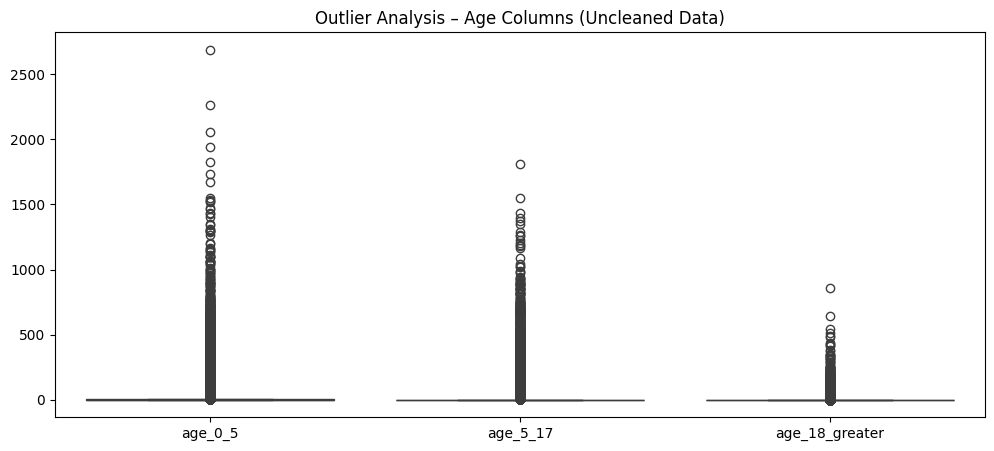

In [59]:
#BOX PLOT FOR AGE GROUPS
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

plt.figure(figsize=(12, 5))
sns.boxplot(data=enrollment_enriched[age_cols])
plt.title("Outlier Analysis – Age Columns (Uncleaned Data)")
plt.show()


In [60]:
#numeric outlier summary (IQR METHOD)
outlier_summary = {}

for col in age_cols:
    Q1 = enrollment_enriched[col].quantile(0.25)
    Q3 = enrollment_enriched[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = enrollment_enriched[(enrollment_enriched[col] < lower) | (enrollment_enriched[col] > upper)]
    
    outlier_summary[col] = {
        "min": enrollment_enriched[col].min(),
        "max": enrollment_enriched[col].max(),
        "outlier_count": len(outliers)
    }

outlier_summary


{'age_0_5': {'min': np.int64(0),
  'max': np.int64(2688),
  'outlier_count': 102616},
 'age_5_17': {'min': np.int64(0),
  'max': np.int64(1812),
  'outlier_count': 134443},
 'age_18_greater': {'min': np.int64(0),
  'max': np.int64(855),
  'outlier_count': 39234}}

In [61]:
#missing values check
enrollment_enriched.isna().sum()


date               0
state              0
district           0
pincode            0
pincode_master     0
state_master       0
district_master    0
age_0_5            0
age_5_17           0
age_18_greater     0
dtype: int64

In [62]:
#invalid state records
valid_states = {
    'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
    'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
    'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa',
    'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir',
    'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
    'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
    'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
    'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
}

invalid_state_rows = enrollment_enriched[~enrollment_enriched['state'].isin(valid_states)]

print("Invalid state records:", len(invalid_state_rows))
invalid_state_rows[['state', 'district', 'pincode']].head(10)


Invalid state records: 16076


,state,district,pincode
564,Jammu and Kashmir,Punch,185121
1259,Jammu and Kashmir,Baramula,193201
1260,Jammu and Kashmir,Jammu,181221
2009,The Dadra And Nagar Haveli And Daman And Diu,Dadra And Nagar Haveli,396230
3056,The Dadra And Nagar Haveli And Daman And Diu,Dadra And Nagar Haveli,396230
3330,Andaman & Nicobar Islands,Andamans,744101
3331,Andaman & Nicobar Islands,Andamans,744107
3332,Andaman & Nicobar Islands,South Andaman,744103
3333,Andaman & Nicobar Islands,South Andaman,744105
3334,Andaman & Nicobar Islands,South Andaman,744207


In [63]:
#pincode validity check
invalid_pincode = enrollment_enriched[
    (~enrollment_enriched['pincode'].astype(str).str.match(r'^\d{6}$'))
]

print("Invalid pincodes:", len(invalid_pincode))
invalid_pincode[['pincode']].head()


Invalid pincodes: 0


,pincode


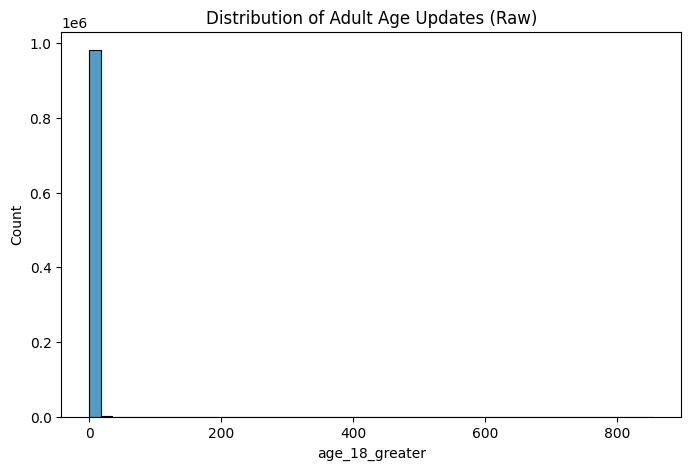

In [64]:
#histogram normal scale for age_18_greater
plt.figure(figsize=(8, 5))
sns.histplot(enrollment_enriched['age_18_greater'], bins=50)
plt.title("Distribution of Adult Age Updates (Raw)")
plt.show()


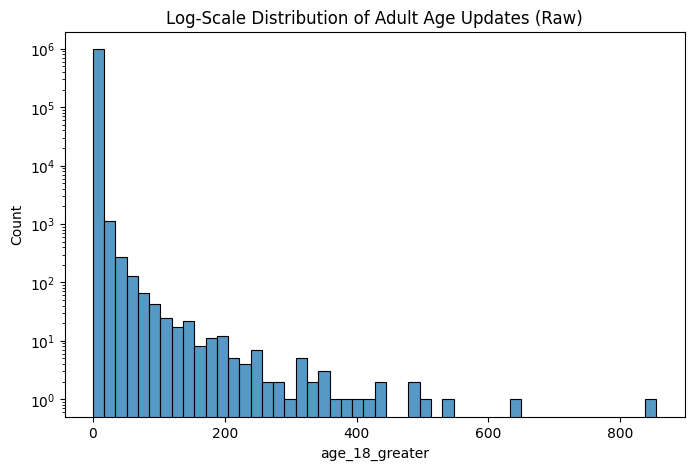

In [65]:
#histogram log scale for age_18_greater
plt.figure(figsize=(8, 5))
sns.histplot(enrollment_enriched['age_18_greater'], bins=50)
plt.yscale('log')
plt.title("Log-Scale Distribution of Adult Age Updates (Raw)")
plt.show()


In [66]:
#overall summary statistics
eda_summary = pd.DataFrame({
    "Column": age_cols,
    "Min": enrollment_enriched[age_cols].min().values,
    "Max": enrollment_enriched[age_cols].max().values,
    "Mean": enrollment_enriched[age_cols].mean().values,
    "Median": enrollment_enriched[age_cols].median().values,
    "Skewness": enrollment_enriched[age_cols].skew().values
})

eda_summary


,Column,Min,Max,Mean,Median,Skewness
0,age_0_5,0,2688,3.608119,2.0,43.160865
1,age_5_17,0,1812,1.750045,0.0,41.304566
2,age_18_greater,0,855,0.171035,0.0,86.794541


CLEANED DATA VISUALIZATION

In [67]:
#dropping redundant columns
enrollment_enriched.drop(['state','district','pincode'], axis=1, inplace=True)

In [68]:
#renaming columns
enrollment_enriched.rename(columns={
    'state_master': 'state',
    'district_master': 'district',
    'pincode_master': 'pincode'
}, inplace=True)

In [69]:
#reordering columns
new_order = ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']

In [70]:
enrollment_enriched= enrollment_enriched[new_order]
enrollment_enriched.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [71]:
#fetching final cleaned enrollment data
enrollment_enriched.to_csv("cleaned_enrollment_data.csv",index=False)

In [72]:
cleaned_df = pd.read_csv("cleaned_enrollment_data.csv")
print("Shape:", cleaned_df.shape)

print("✅ Column Names:")
print(cleaned_df.columns)

print("✅ Missing Values (Top View):")
print(cleaned_df.isna().sum())

print("✅ Duplicate Rows Count:")
print(cleaned_df.duplicated().sum())

print("✅ Unique Value Counts:")
print("Unique States   :", cleaned_df['state_master'].nunique() if 'state_master' in cleaned_df.columns else cleaned_df['state'].nunique())
print("Unique Districts:", cleaned_df['district_master'].nunique() if 'district_master' in cleaned_df.columns else cleaned_df['district'].nunique())
print("Unique Pincodes :", cleaned_df['pincode'].nunique())

Shape: (983051, 7)
✅ Column Names:
Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')
✅ Missing Values (Top View):
date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64
✅ Duplicate Rows Count:
19369
✅ Unique Value Counts:
Unique States   : 36
Unique Districts: 771
Unique Pincodes : 19462


In [73]:
cleaned_df = (cleaned_df
    .groupby(['date', 'pincode','state','district'], as_index=False)
    [['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
)



In [74]:
cleaned_df.duplicated(subset=['date', 'pincode','state','district']).sum()

np.int64(0)

In [75]:
print(cleaned_df.shape)
print(cleaned_df[['pincode','state','district']].nunique())

(868855, 7)
pincode     19462
state          36
district      771
dtype: int64


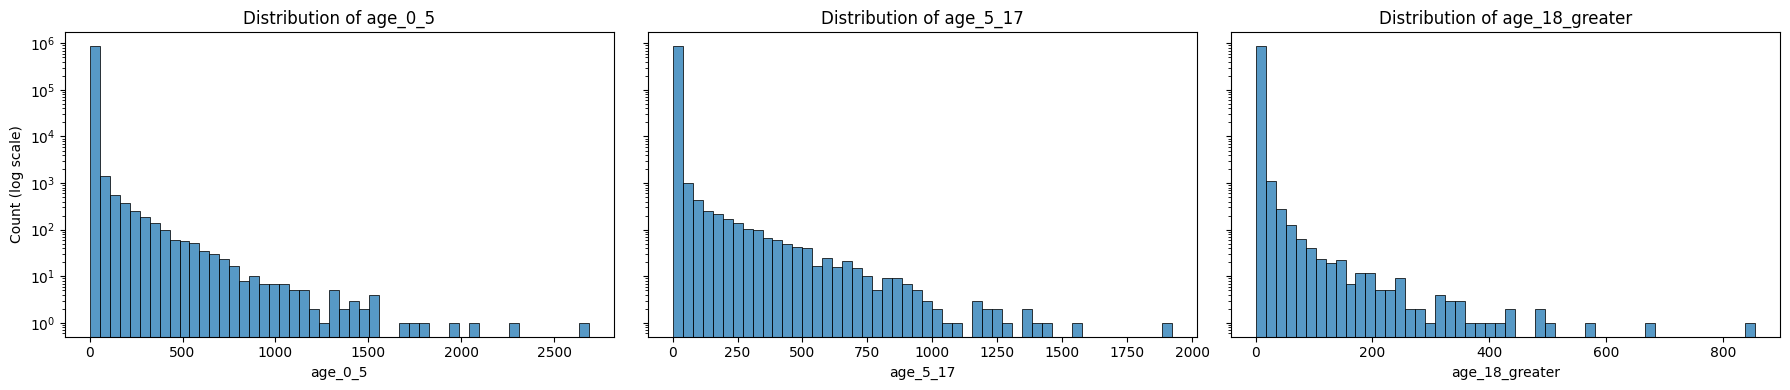

In [76]:
#histogram for age groups
cols = ['age_0_5', 'age_5_17', 'age_18_greater']

fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

for ax, c in zip(axes, cols):
    sns.histplot(cleaned_df[c], bins=50, ax=ax)
    ax.set_title(f"Distribution of {c}")
    ax.set_yscale("log")   # optional for heavy skew
    ax.set_xlabel(c)

axes[0].set_ylabel("Count (log scale)")
plt.tight_layout()
plt.show()

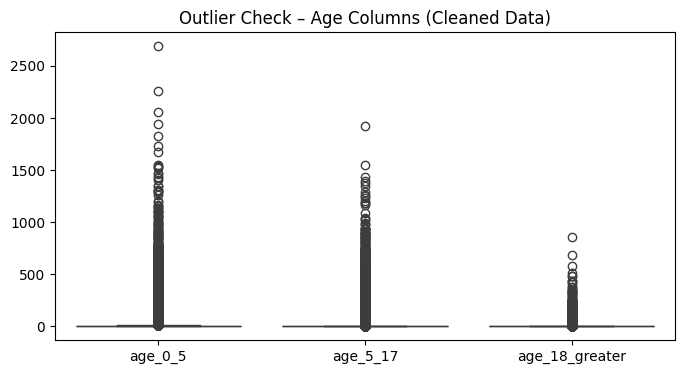

In [77]:
#outlier summary after cleaning
plt.figure(figsize=(8,4))
sns.boxplot(data=cleaned_df[cols])
plt.title("Outlier Check – Age Columns (Cleaned Data)")
plt.show()


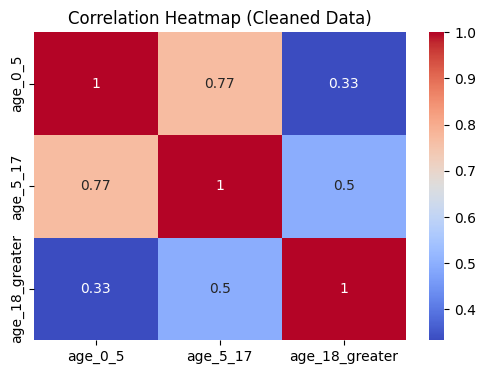

In [78]:
#correlation matrix
corr = cleaned_df[cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Cleaned Data)")
plt.show()


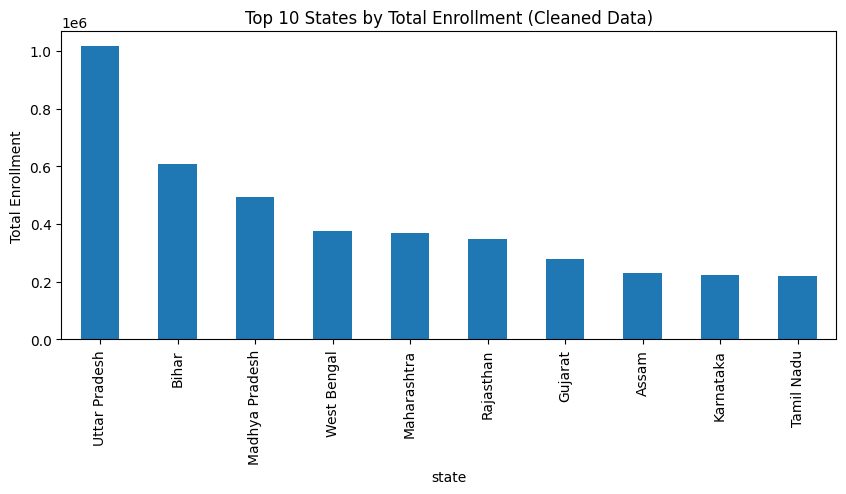

In [81]:
#top 10 state & district by total enrollments
cleaned_df['total_enrollment'] = cleaned_df[cols].sum(axis=1)

top_states = (
    cleaned_df.groupby('state')['total_enrollment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_states.plot(kind="bar", figsize=(10,4))
plt.title("Top 10 States by Total Enrollment (Cleaned Data)")
plt.ylabel("Total Enrollment")
plt.show()


In [82]:
#before & after
raw_rows = enrollment_enriched.shape[0]
clean_rows = cleaned_df.shape[0]

print("BEFORE vs AFTER CLEANING")
print("------------------------")
print("Raw rows        :", raw_rows)
print("Cleaned rows    :", clean_rows)
print("Reduction %     :", round((raw_rows-clean_rows)/raw_rows*100, 2), "%")
print("Unique pincodes :", cleaned_df['pincode'].nunique())
print("Unique states   :", cleaned_df['state'].nunique())
print("Unique districts:", cleaned_df['district'].nunique())


BEFORE vs AFTER CLEANING
------------------------
Raw rows        : 983051
Cleaned rows    : 868855
Reduction %     : 11.62 %
Unique pincodes : 19462
Unique states   : 36
Unique districts: 771


FEATURE ENGINEERING

In [84]:
#date,year,month
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['date'].dt.year
cleaned_df['month'] = cleaned_df['date'].dt.month
cleaned_df['month_name'] = cleaned_df['date'].dt.strftime('%B')


In [85]:
#quarter
cleaned_df['quarter'] = cleaned_df['date'].dt.quarter


In [86]:
#zone
zone_mapping = {
    # North
    "Jammu And Kashmir": "North",
    "Ladakh": "North",
    "Himachal Pradesh": "North",
    "Punjab": "North",
    "Haryana": "North",
    "Delhi": "North",
    "Chandigarh": "North",
    "Uttarakhand": "North",
    "Uttar Pradesh": "North",
    
    # West
    "Rajasthan": "West",
    "Gujarat": "West",
    "Goa": "West",
    "Maharashtra": "West",
    "Dadra And Nagar Haveli And Daman And Diu": "West",
    
    # Central
    "Madhya Pradesh": "Central",
    "Chhattisgarh": "Central",
    
    # East
    "Bihar": "East",
    "Jharkhand": "East",
    "West Bengal": "East",
    "Odisha": "East",
    
    # South
    "Andhra Pradesh": "South",
    "Telangana": "South",
    "Karnataka": "South",
    "Tamil Nadu": "South",
    "Kerala": "South",
    "Puducherry": "South",
    "Lakshadweep": "South",
    
    # North-East
    "Assam": "North-East",
    "Arunachal Pradesh": "North-East",
    "Manipur": "North-East",
    "Meghalaya": "North-East",
    "Mizoram": "North-East",
    "Nagaland": "North-East",
    "Sikkim": "North-East",
    "Tripura": "North-East",
    
    # Islands
    "Andaman And Nicobar Islands": "Islands"
}
cleaned_df['zone'] = cleaned_df['state'].map(zone_mapping)


In [87]:
#checking missing zone values
cleaned_df['zone'].isna().sum()


np.int64(637)

In [88]:
#new order of columns
cleaned_df = cleaned_df[
    [
        'date', 'year', 'quarter', 'month', 'month_name',
        'zone', 'state', 'district', 'pincode',
        'age_0_5', 'age_5_17', 'age_18_greater'
    ]
]


In [89]:
#verifying new order
cleaned_df.columns

Index(['date', 'year', 'quarter', 'month', 'month_name', 'zone', 'state',
       'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater'],
      dtype='object')

In [91]:
cleaned_df.to_csv("cleaned_enrollment_data.csv",index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_enrollment_data.csv'